# **1. Objetivo**

Hacer un historico de gráficos que he ido encontrando.

# 2 Nube de puntos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


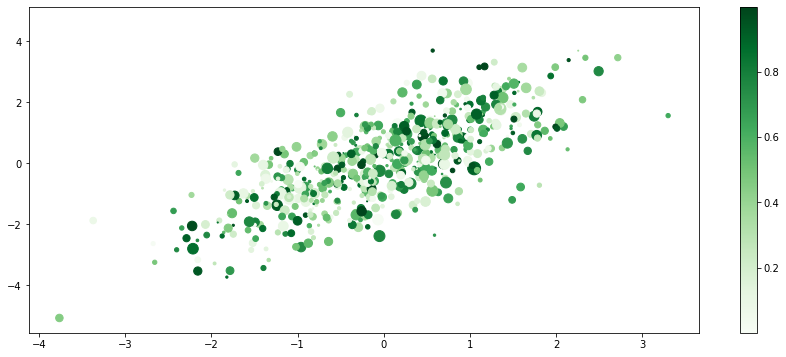

In [7]:
##Otro grafico
x1 = np.random.randn(1000)
y1 = np.random.randn(1000) + x1
s = 10 + 50 * np.random.randn(1000)
c = np.random.rand(1000)

mpl.figure(figsize=(15,6))

mpl.scatter(x1,y1, s = s, c = c, cmap=mpl.cm.Greens)
mpl.grid(False)
mpl.colorbar()


## 2 Pie y/o barra

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
        "d": np.random.binomial(5, .3, 1000),
        "e": np.random.binomial(1, .3, 1000),
    },
    columns=["a", "b", "c", "d", "e"],
)
df1 = df[['d', 'e']]
df2 = df1.groupby('d', as_index=False).count()

In [21]:
def grafico(tipo,dx,dy,titulo):
  if tipo == 'Torta':
    y = np.array(dy)
    mylabels = list(dx)
    explode = (0.1, 0.0)
    colors = ( "royalblue","cyan", "blue","darkcyan","navy", "gold","darkgoldenrod")
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(y,
                                      autopct = lambda pct: func(pct, y),
                                      #explode = explode,
                                      labels = mylabels,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="white"))

    ax.legend(wedges, mylabels,
              title = titulo,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(titulo)

    plt.show()
  if tipo == 'Barra':
    y = np.array(dy)
    mylabels = list(dx)
    y_pos = np.arange(len(mylabels))

    plt.figure(figsize=(10,6))
    plt.barh(y_pos, y, color = (0.5,0.1,0.5,0.6))
    plt.title(titulo)
    plt.xlabel('Titulo eje x')
    plt.ylabel(titulo)
    plt.yticks(y_pos, mylabels)

    plt.show()

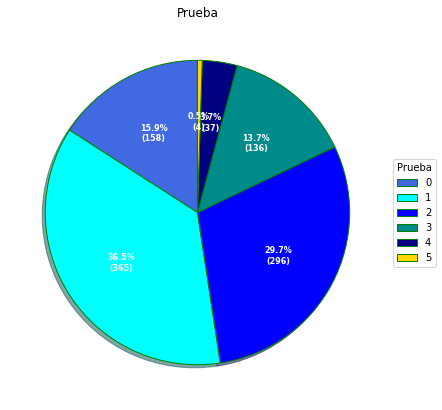

In [22]:
grafico('Torta',df2['d'],df2['e'],"Prueba")

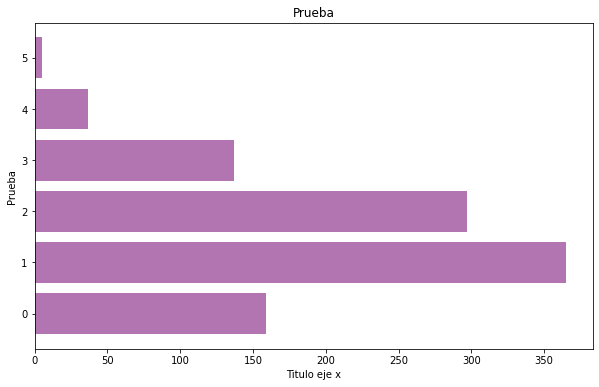

In [23]:
grafico('Barra',df2['d'],df2['e'],"Prueba")